# Detailed Brand Analysis of cars while attempting to understand the people's perceptions 

In [2]:
#Reading all the stored posts obtained from the web scrapper
#built on Edmunds Members - Cars & Conversations discussion forum
import pandas as pd
posts=pd.read_csv('posts.csv')

In [3]:
posts = posts.replace(r'\n',' ', regex=True)
posts = posts.replace(r'\r',' ', regex=True)
posts.head(2)

,Unnamed: 0,Date,User,Text
0,0,Sep-26,snakeweasel,I went and checked and yes the 59k one is an...
1,1,Sep-26,snakeweasel,I would have told them that I used to but I ...


In [4]:
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize

# Identifying top 10 brands by frequency 

In [5]:
from string import punctuation
def unique_words(s):
# Remove punctuation & others, convert to lower and finally stopwords
    s=str(s)
    for p in punctuation:
        s =s.replace(p,'')
    s=s.lower()
    return list(set(re.findall('\w+',s)))

posts['unique_words_list']=posts['Text'].map(unique_words)

In [6]:
posts[:5]

,Unnamed: 0,Date,User,Text,unique_words_list
0,0,Sep-26,snakeweasel,I went and checked and yes the 59k one is an...,"[and, the, hyundai, checked, ctx700d, 2015, i,..."
1,1,Sep-26,snakeweasel,I would have told them that I used to but I ...,"[because, sonata, have, sebring, ragtop, would..."
2,2,Sep-26,bwia,"No, it can't be otherwise the transactions w...","[secure, is, africa, it, cant, in, even, slow,..."
3,3,Sep-26,Mr_Shiftright,stickguy said: function is not reliability. S...,"[and, alfa, help, just, is, share, satisfactio..."
4,4,Sep-26,imidazol97,show previous quotes I would have tol...,"[because, golf, show, cobalt, back, nascar, ye..."


In [7]:
# Mapping  to brand
car_mapping=pd.read_csv('car-list.csv')
def lowering (s):
    s=s.rstrip()
    return s.lower()
car_mapping['model']=car_mapping['model'].map(lowering)
car_mapping['brand']=car_mapping['brand'].map(lowering)

In [8]:
def mentioned_brands(list_1):
    list_i=pd.DataFrame(list_1)
    mask=car_mapping['model'].isin(pd.Series(list_1))
    joiner=car_mapping[mask]
    joined=joiner.merge(list_i, left_on='model', right_on=0)
    out=set(list(joined['brand']))
    return list(out)

posts['unique_brands']=posts['unique_words_list'].map(mentioned_brands)


In [11]:
posts.head()

,Unnamed: 0,Date,User,Text,unique_words_list,unique_brands
0,0,Sep-26,snakeweasel,I went and checked and yes the 59k one is an...,"[and, the, hyundai, checked, ctx700d, 2015, i,...","[ lexus, hyundai, peugeot, chrysler]"
1,1,Sep-26,snakeweasel,I would have told them that I used to but I ...,"[because, sonata, have, sebring, ragtop, would...","[ hyundai, peugeot, chrysler]"
2,2,Sep-26,bwia,"No, it can't be otherwise the transactions w...","[secure, is, africa, it, cant, in, even, slow,...",[ lexus]
3,3,Sep-26,Mr_Shiftright,stickguy said: function is not reliability. S...,"[and, alfa, help, just, is, share, satisfactio...",[ lexus]
4,4,Sep-26,imidazol97,show previous quotes I would have tol...,"[because, golf, show, cobalt, back, nascar, ye...","[ chevrolet, peugeot, volkswagen]"


In [12]:
unique_brands_superlist=posts['unique_brands'].sum()
unique_brands=nltk.FreqDist(unique_brands_superlist)
unique_brands=pd.DataFrame.from_dict(unique_brands, orient='index', columns=['freq']).sort_values(by='freq', ascending=False)

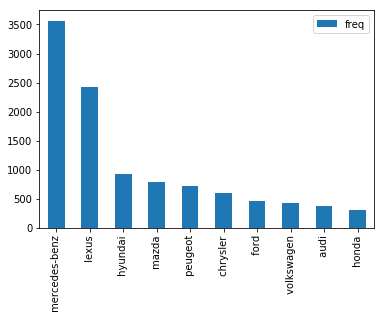

In [16]:
unique_brands[:10].plot(kind='bar')

In [18]:
import numpy as np
from itertools import combinations, groupby
from collections import Counter

# Sample data
unique_brands_list = list(unique_brands.index.values)
def combination_of_2(set):
    return list(combinations(set,2))

posts['combinations_of_2']=posts['unique_brands'].map(combination_of_2)
set_of_1=posts['unique_brands'].sum()
set_of_2=posts['combinations_of_2'].sum()

from collections import Counter
count_1s=Counter(set_of_1)
count_2s=Counter(set_of_2)

In [19]:
unique_name=unique_brands.index.values
matrix = pd.DataFrame(index=unique_name, columns=unique_name)
for row in unique_name:
       for column in unique_name:
            if row==column:
                matrix.loc[row,column]=0
            else:
                matrix.loc[row,column]=((count_2s[(row, column)]+count_2s[(column, row)])*len(posts)*1.0)/(count_1s[row]*count_1s[column]*1.0)
matrix.iloc[:14,:14]

,mercedes-benz,lexus,hyundai,mazda,peugeot,chrysler,ford,volkswagen,audi,honda,nissan,subaru,chevrolet,infiniti
mercedes-benz,0,1.20131,0.875713,1.2328,0.879591,0.892423,1.09071,1.32481,1.23067,1.04619,1.2462,1.11577,1.05404,1.09714
lexus,1.20131,0,0.82295,1.35091,0.870306,0.915564,1.16728,1.60099,1.60191,1.06228,1.22975,1.09538,0.934913,0.982689
hyundai,0.875713,0.82295,0,1.70717,2.79701,3.3067,0.246798,0.508367,0.336052,0.328163,0.367401,3.37878,0.34701,0.422033
mazda,1.2328,1.35091,1.70717,0,0.68054,0.69005,1.14554,1.78412,1.78023,1.30274,0.974475,4.3446,1.01727,1.0261
peugeot,0.879591,0.870306,2.79701,0.68054,0,4.22389,0.287579,0.511005,2.25809,0.422641,2.47854,0.117609,5.45705,0.310592
chrysler,0.892423,0.915564,3.3067,0.69005,4.22389,0,4.09912,0.44013,0.405892,0.453152,0.459018,0.281869,0.310056,0.279145
ford,1.09071,1.16728,0.246798,1.14554,0.287579,4.09912,0,0.973444,0.941199,0.903987,0.704376,0.625015,0.698546,0.647293
volkswagen,1.32481,1.60099,0.508367,1.78412,0.511005,0.44013,0.973444,0,4.40647,1.6874,0.594519,2.09463,0.736998,1.70731
audi,1.23067,1.60191,0.336052,1.78023,2.25809,0.405892,0.941199,4.40647,0,0.907745,4.77262,0.63992,0.63992,0.855039
honda,1.04619,1.06228,0.328163,1.30274,0.422641,0.453152,0.903987,1.6874,0.907745,0,0.569352,1.29678,1.08065,6.59959


<Figure size 1800x1440 with 0 Axes>

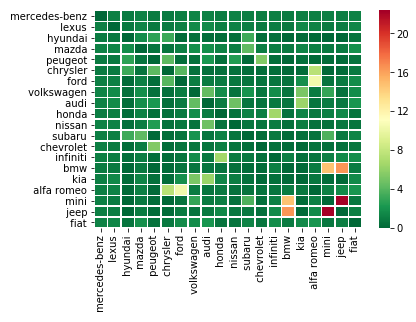

<Figure size 1800x1440 with 0 Axes>

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
matrix_c = matrix.iloc[:20,:20].apply(pd.to_numeric, errors='coerce')
matrix_c
sns.heatmap(matrix_c, cmap='RdYlGn_r', linewidths=0.5)
plt.figure(figsize=(25,20))
#plt.show()

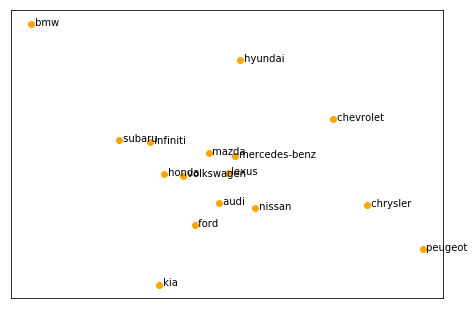

In [26]:
matrix_1=matrix.iloc[:16,:16]
matrix_1=matrix_1.replace(np.nan,0)

import numpy as np
from sklearn import manifold
from sklearn.manifold import MDS

mdsdf = 1/matrix_1

mdsdf=mdsdf.replace(np.nan,0)
mdsdf=mdsdf.replace(np.inf,0)

mdsmatrix=mdsdf.values

from matplotlib import pyplot as plt

mds=manifold.MDS(n_components=2, dissimilarity ='precomputed', random_state=10)

results=mds.fit(mdsmatrix)
coords=results.embedding_

x=coords[:,0]
y=coords[:,1]

ax=plt.axes([0.,0.,1.,1.])
plt.scatter(x,y,marker='o',color='orange')

n=list(mdsdf.index)

for i,n in enumerate(n):
    #print(x[i].item())
    #print(n)
    #print(type(y[i]))
    if n=='kia':
        ax.annotate(n,xy=((x[i]+.01),y[i]-.01))
    else:
        ax.annotate(n,xy=((x[i]+.01),y[i]-.02))

plt.xticks([])
plt.yticks([])

plt.show()



# Insights for brand managers

As per our analysis, Mercedes-Benz is facing a really tough competition from Lexus. Despite of the fact that they are perceived to be playing in very different league. Another interesting fact is appearance of Mazda really close to these brands which is unexpected as it isn't a premiere league car. BMW is appearing really far away from all of these which is strange again as these are perceived to be equivalent brands 

In our MDS mapping, Hyundai and Honda are one of the two brand pairs far apart, meaning that they were the least frequently mentioned pair in the posts we collected. This is surprising because our perception was that these two brands are close competitors.

If Honda is actually closer to VW in the minds of the crowd, then Honda should be trying to differentiate itself from its German competitors while retaining the positive aspects of being compared with VW and Audi. For example, German cars are usually more associated with clean, high quality interiors. Honda can try to match this attention to detail, but offer people a lower cost (up front and maintenance).

As per our analysis, Mercedes-Benz is facing a really tough competition from Lexus. Despite of the fact that they are perceived to be playing in very different league. Another interesting fact is appearance of Mazda really close to these brands which is unexpected as it isn't a premiere league car.

# Most frequently mentioned car attributes 

In [27]:
unique_brands_superlist=posts['unique_brands'].sum()
top_5_brands=unique_brands[:5]
car_mapping1=car_mapping.merge(top_5_brands,left_on='brand',right_index=True,how='inner')
def mentioned_topbrands(list_1):
    list_i=pd.DataFrame(list_1)
    mask=car_mapping1['model'].isin(pd.Series(list_1))
    joiner=car_mapping1[mask]
    joined=joiner.merge(list_i, left_on='model', right_on=0)
    out=set(list(joined['brand']))
    return list(out)

posts['unique_topbrands']=posts['unique_words_list'].map(mentioned_topbrands)


In [28]:
posts.head()

,Unnamed: 0,Date,User,Text,unique_words_list,unique_brands,combinations_of_2,unique_topbrands
0,0,Sep-26,snakeweasel,I went and checked and yes the 59k one is an...,"[and, the, hyundai, checked, ctx700d, 2015, i,...","[ lexus, hyundai, peugeot, chrysler]","[( lexus, hyundai), ( lexus, peugeot), ( lex...","[ lexus, hyundai, peugeot]"
1,1,Sep-26,snakeweasel,I would have told them that I used to but I ...,"[because, sonata, have, sebring, ragtop, would...","[ hyundai, peugeot, chrysler]","[( hyundai, peugeot), ( hyundai, chrysler), ...","[ hyundai, peugeot]"
2,2,Sep-26,bwia,"No, it can't be otherwise the transactions w...","[secure, is, africa, it, cant, in, even, slow,...",[ lexus],[],[ lexus]
3,3,Sep-26,Mr_Shiftright,stickguy said: function is not reliability. S...,"[and, alfa, help, just, is, share, satisfactio...",[ lexus],[],[ lexus]
4,4,Sep-26,imidazol97,show previous quotes I would have tol...,"[because, golf, show, cobalt, back, nascar, ye...","[ chevrolet, peugeot, volkswagen]","[( chevrolet, peugeot), ( chevrolet, volkswa...",[ peugeot]


In [29]:
# replacing models and brands with empty string"
def joining(s):
    s1=" ".join(s)
    return s1
posts['words combined']=posts['unique_words_list1']=posts['unique_words_list'].map(joining)
a=posts['words combined'].str.cat(sep = ' ')
brand=list(car_mapping['brand'])
brand1=[]
for i in brand:
    j=str(i).replace(' ','')
    brand1.append(j)
for p in brand1:
    a1=str(a).replace(p,"")

for p in list(car_mapping['model']):
    a2=str(a1).replace(p,"")

In [39]:
attrbute_mapping=pd.read_csv("Attributesmapping.csv")
attrbute_mapping[24:29]

,words,count,attributes
24,sport,652,performance
25,good,639,performance
26,even,621,performance
27,new,614,features n look
28,day,597,NaN


In [40]:
attrbute_mapping=attrbute_mapping.dropna(how='any')
attrbute_mapping.head()

,words,count,attributes
12,previous,910,practical
13,time,908,practical
15,think,842,practical
17,wife,771,practical
21,need,687,desire


In [41]:
top5_brands=unique_brands[:5]
top5_brands

,freq
mercedes-benz,3562
lexus,2424
hyundai,926
mazda,798
peugeot,719


In [61]:
from pandas import Series, DataFrame
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
s = re.findall('\w+', a2)
s = [w for w in s if not w in stop_words]
lemmatizer = WordNetLemmatizer()
s = Series(s).map(lemmatizer.lemmatize)
attribute_freq=DataFrame(s.value_counts())
#attribute_freq

In [42]:
def mentioned_attributes(list_1):
    list_i=pd.DataFrame(list_1)
    mask=attrbute_mapping['words'].isin(pd.Series(list_1))
    joiner=attrbute_mapping[mask]
    joined=joiner.merge(list_i, left_on='words', right_on=0)
    out=set(list(joined['attributes'].dropna()))
    return list(out)

posts['unique_attributes']=posts['unique_words_list'].map(mentioned_attributes)


In [49]:
posts['brand_attr']=posts['unique_topbrands']+posts['unique_attributes']

In [50]:
posts.head()

,Unnamed: 0,Date,User,Text,unique_words_list,unique_brands,combinations_of_2,unique_topbrands,words combined,unique_words_list1,unique_attributes,brand_attr
0,0,Sep-26,snakeweasel,I went and checked and yes the 59k one is an...,"[and, the, hyundai, checked, ctx700d, 2015, i,...","[ lexus, hyundai, peugeot, chrysler]","[( lexus, hyundai), ( lexus, peugeot), ( lex...","[ lexus, hyundai, peugeot]",and the hyundai checked ctx700d 2015 i is hond...,and the hyundai checked ctx700d 2015 i is hond...,[],"[ lexus, hyundai, peugeot]"
1,1,Sep-26,snakeweasel,I would have told them that I used to but I ...,"[because, sonata, have, sebring, ragtop, would...","[ hyundai, peugeot, chrysler]","[( hyundai, peugeot), ( hyundai, chrysler), ...","[ hyundai, peugeot]",because sonata have sebring ragtop would fast ...,because sonata have sebring ragtop would fast ...,[],"[ hyundai, peugeot]"
2,2,Sep-26,bwia,"No, it can't be otherwise the transactions w...","[secure, is, africa, it, cant, in, even, slow,...",[ lexus],[],[ lexus],secure is africa it cant in even slow no parts...,secure is africa it cant in even slow no parts...,[performance],"[ lexus, performance]"
3,3,Sep-26,Mr_Shiftright,stickguy said: function is not reliability. S...,"[and, alfa, help, just, is, share, satisfactio...",[ lexus],[],[ lexus],and alfa help just is share satisfaction not a...,and alfa help just is share satisfaction not a...,[desire],"[ lexus, desire]"
4,4,Sep-26,imidazol97,show previous quotes I would have tol...,"[because, golf, show, cobalt, back, nascar, ye...","[ chevrolet, peugeot, volkswagen]","[( chevrolet, peugeot), ( chevrolet, volkswa...",[ peugeot],because golf show cobalt back nascar years quo...,because golf show cobalt back nascar years quo...,[practical],"[ peugeot, practical]"


In [51]:
##If you want distinct count of frequencies of attributes
unique_attributes=nltk.FreqDist(posts['unique_attributes'].sum())
unique_attributes=pd.DataFrame.from_dict(unique_attributes, orient='index', columns=['freq']).sort_values(by='freq', ascending=False)
unique_attributes[:5]

,freq
practical,3206
performance,2977
features n look,2047
durability,1713
desire,1287


## Top Feature is practicality (which includes price, family, durability, mileage, safety) 

In [52]:
# Sample data
unique_attributes_list = list(unique_attributes.index.values)

# Brands association with features

In [53]:
from itertools import combinations
def combination_of_2(set):
    return list(combinations(set,2))

posts['combinations_of_2_1']=posts['brand_attr'].map(combination_of_2)

In [54]:
#Time taking chunk of code
for i in range(len(posts)):
    posts['combinations_of_2_1'][i]=list(set(posts['combinations_of_2_1'][i])-set(posts['combinations_of_2'][i]))

C:\Users\judge\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
posts['combinations_of_brandattr']=posts['brand_attr'].map(combination_of_2)
posts['combinations_of_brandattr'][:5]

0    [( lexus,  hyundai), ( lexus,  peugeot), ( hyu...
1                               [( hyundai,  peugeot)]
2                              [( lexus, performance)]
3                                   [( lexus, desire)]
4                              [( peugeot, practical)]
Name: combinations_of_brandattr, dtype: object

In [56]:
set_of_1_comb=posts['combinations_of_2_1'].sum()

In [57]:
set_of_2_attr=posts['unique_attributes'].sum()
set_of_2_attr[:3]

['performance', 'desire', 'practical']

In [58]:
from collections import Counter
count_2s_comb=Counter(set_of_1_comb)
# count_2s_comb is a dictionary with count of occurences of pairs

In [59]:
count_1_attr=Counter(posts['brand_attr'].sum())
# count_1_attr is a dictionary with count of occurences of pairs

In [60]:
unique_row_name=top5_brands.index.values
unique_column_name=unique_attributes.index.values
matrix_ba = pd.DataFrame(index=unique_row_name, columns=unique_column_name)

In [61]:
for row in unique_row_name:
       for column in unique_column_name:
            if count_1_attr[row]*count_1_attr[column]==0:
                matrix_ba.loc[row,column]=0
            else:
                matrix_ba.loc[row,column]=((count_2s_comb[(row, column)]+count_2s_comb[(column, row)])*1.0)*len(posts)/(count_1_attr[row]*count_1_attr[column])*1.0
                

In [62]:
matrix_ba = matrix_ba.apply(pd.to_numeric, errors='coerce')
matrix_ba

,practical,performance,features n look,durability,desire
mercedes-benz,1.136236,1.123085,1.226884,1.219153,1.211016
lexus,1.223907,1.161968,1.285316,1.275518,1.266067
hyundai,0.863349,1.107722,0.757956,0.896274,0.768692
mazda,1.283596,1.382334,1.342283,1.578367,1.452532
peugeot,0.881707,0.783480,0.789100,0.906378,0.687048


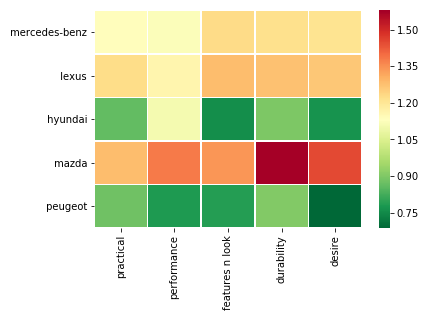

In [63]:
sns.heatmap(matrix_ba, cmap='RdYlGn_r', linewidths=0.5)

According to the data we scrapped, BMW doesn't appear in top for any of these positive attributes. So BMW as it claims to be "ultimate driving machine" doesn't seem to be the case atleast for our bunch of users  

# More insights for Product & Marketing teams

Continuing with Hyundai, a product manager can look at associations with their cars and see that their brand is lowest in desirability, features, and look. To improve their association with these attributes, product managers can focus more on the internal and external design of their cars. A marketing manager can leverage the association of Hyundai with performance with a new design scheme to increase desirability. Hyundai and Peugeot are almost associated with the attributes in a similar way except for performance. It would be better for product managers at Peugeot to focus on improving performance to be able to be on par with hyundai.

Again we also see Mercedes and Lexus in very close competition across all attributes, but we also see Mazda with very high association with these same features. The marketing managers at the luxury brands, MB and Lexus, should be trying to market their supposedly superior features to people that are talking about Mazda. Mazda product managers need to ensure that their vehicles actually perform to the expectations of the users. Mazda leads in durability by far, and should work to keep that differentiation

# Most aspirational brand for our users - MAZDA!!!!!

“Aspirational” (i.e. desirability) was measured with a word association algorithm liking want-words with higher scores. Our analysis involved running the collection of comments through functions that counted the occurrence of words like “dream”, “love”, and “wanted”. Higher instances resulted in higher scores. The most desirable brand according to this method is Mazda, which makes intuitive sense as they lead in all other categories.

They are by far the strongest contender for durability and performance, and do slightly better than all others in looks and practicality, according to the data. Therefore, their best advice is to maintain their strongest leads while staying competitive with everyone else in the other. Market their practicality and looks more aggressively to give them the lead they already have in durability and performance. 
